# Problem 1: Linear Regression

# Problem Statement: You are a part of an investing firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

# Data Dictionary for Firm_level_data:
# 1. sales: Sales (in millions of dollars).
# 2. capital: Net stock of property, plant, and equipment.
# 3. patents: Granted patents.
# 4. randd: R&D stock (in millions of dollars).
# 5. employment: Employment (in 1000s).
# 6. sp500: Membership of firms in the S&P 500 index. S&P, is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States
# 7. tobinq: Tobin's q (also known as q ratio and Kaldor's v) is the ratio between a physical asset's market value and its replacement value.
# 8. value: Stock market value.
# 9. institutions: Proportion of stock owned by institutions.

# Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Question 1.1

# Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. 

In [2]:
df=pd.read_csv('Firm_level_data.csv')

In [3]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
df.tail()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [5]:
df.shape

(759, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [7]:
df.dtypes

Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,759.0,379.000000,219.248717,0.000000,189.500000,379.000000,568.500000,758.000000
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [9]:
df.isnull().sum()

Unnamed: 0       0
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [10]:
df.duplicated().sum()

0

# The data set contains 759 row, 10 columns .float64(7), int64(2), object(1)
# there are 2 Integer type features,7 Float type features. 1 Object type features(sp500)
# index column (Unnamed: 0) we can remove it.
# as we can see in above that we have a null value in tobinq.1

In [11]:
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [12]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [13]:
df.duplicated().sum()

0

# As checked we dont have any duplicate value in given data set.


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [15]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

# As we can see that there is missing value in tobinq section - 21.

<AxesSubplot:>

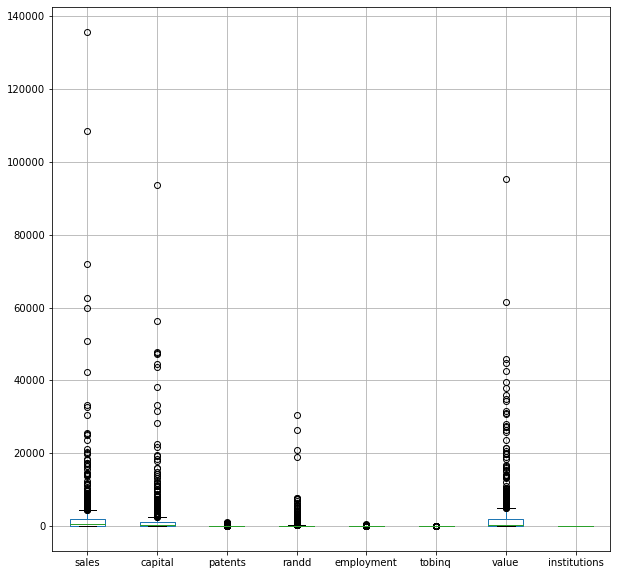

In [16]:
df.boxplot(figsize=(10,10))

{'whiskers': [<matplotlib.lines.Line2D at 0x20c61424820>,
 'caps': [<matplotlib.lines.Line2D at 0x20c61424f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c61424490>],
 'medians': [<matplotlib.lines.Line2D at 0x20c614336a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c61433a30>],
 'means': []}

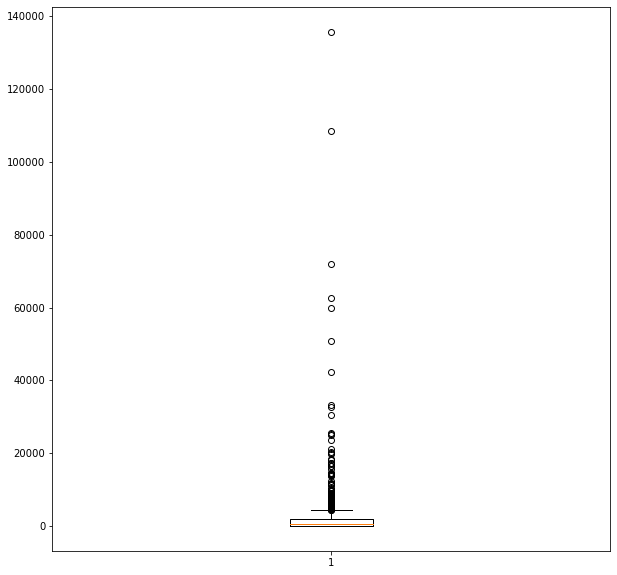

In [17]:
plt.figure(figsize=(10,10))
plt.boxplot(x='sales',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c617b6880>,
 'caps': [<matplotlib.lines.Line2D at 0x20c617b6fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c617b64f0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c617c3700>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c617c3a90>],
 'means': []}

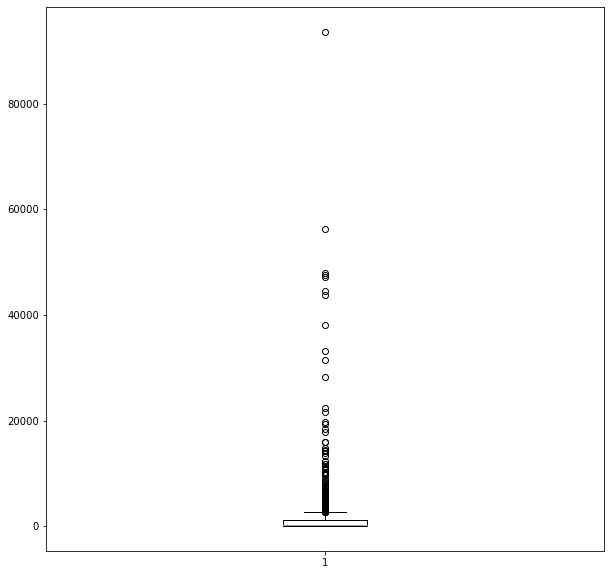

In [18]:
plt.figure(figsize=(10,10))
plt.boxplot(x='capital',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c61810d90>,
 'caps': [<matplotlib.lines.Line2D at 0x20c6181e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c61810a00>],
 'medians': [<matplotlib.lines.Line2D at 0x20c6181ec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c6181efa0>],
 'means': []}

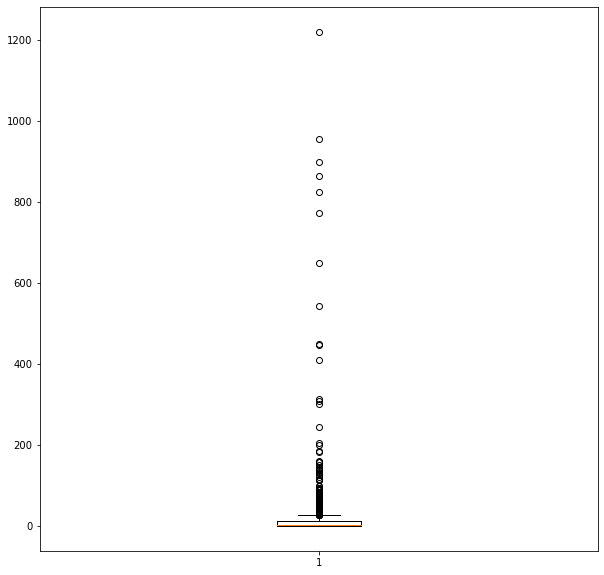

In [19]:
plt.figure(figsize=(10,10))
plt.boxplot(x='patents',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c61876f70>,
 'caps': [<matplotlib.lines.Line2D at 0x20c618856d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c61876be0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c61885df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c6188f1c0>],
 'means': []}

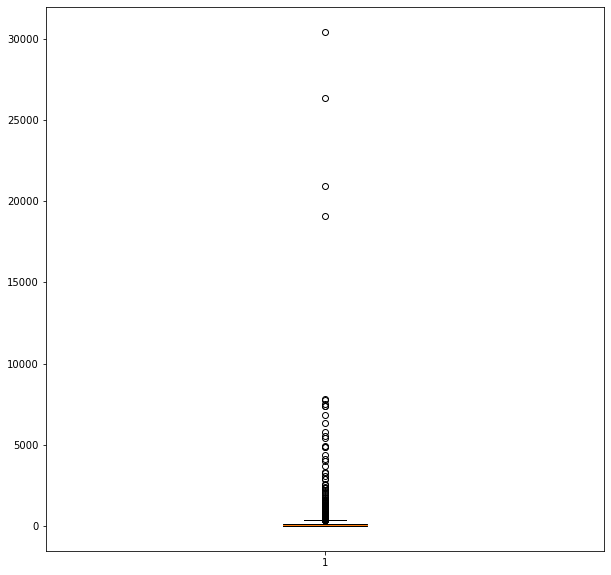

In [20]:
plt.figure(figsize=(10,10))
plt.boxplot(x='randd',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c6194b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c6194b910>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c618d9e20>],
 'medians': [<matplotlib.lines.Line2D at 0x20c61954070>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c61954400>],
 'means': []}

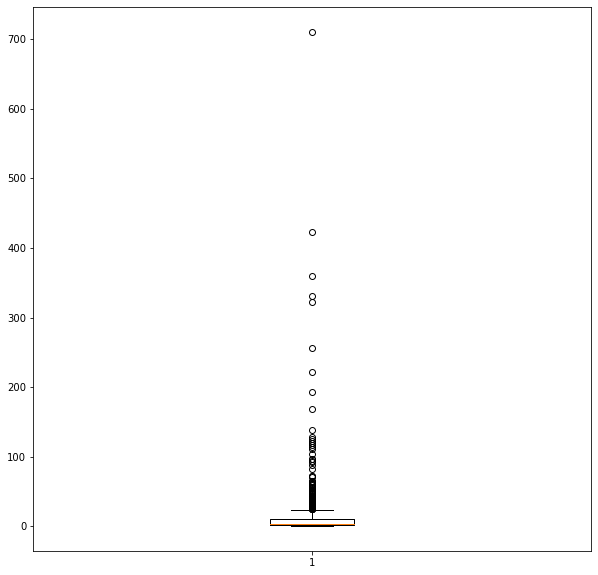

In [21]:
plt.figure(figsize=(10,10))
plt.boxplot(x='employment',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c61b118e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c61b1c040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c61b11550>],
 'medians': [<matplotlib.lines.Line2D at 0x20c61b1c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c61b1caf0>],
 'means': []}

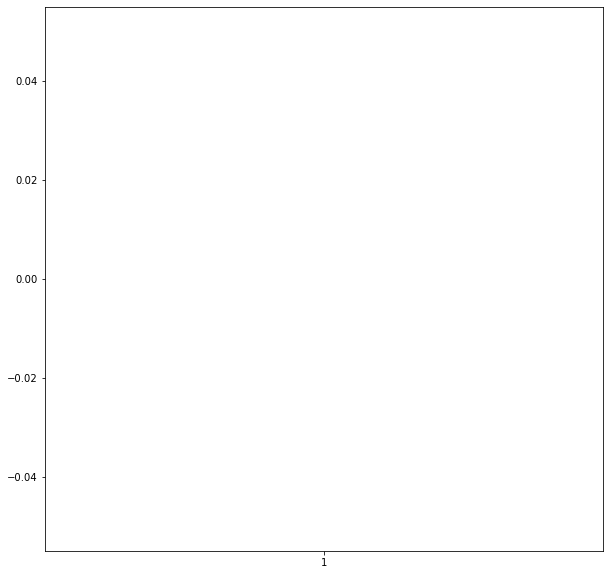

In [22]:
plt.figure(figsize=(10,10))
plt.boxplot(x='tobinq',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c61fc8eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c61fd6610>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c61fc8b20>],
 'medians': [<matplotlib.lines.Line2D at 0x20c61fd6d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c61fe1100>],
 'means': []}

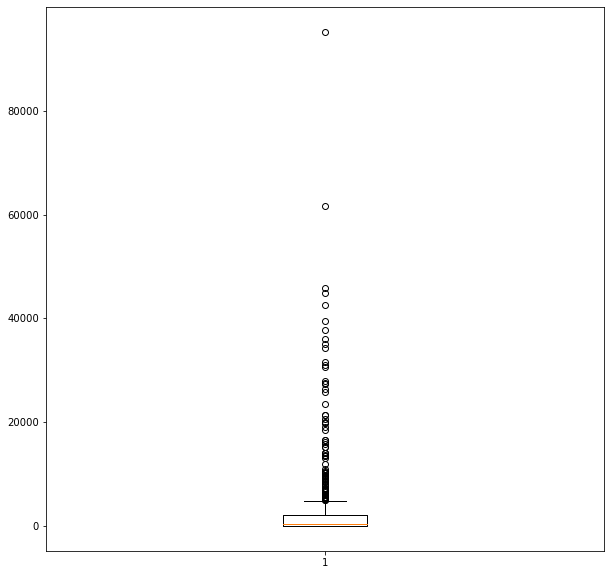

In [23]:
plt.figure(figsize=(10,10))
plt.boxplot(x='value',data=df,whis=1.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c62191400>,
 'caps': [<matplotlib.lines.Line2D at 0x20c62191b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c62191070>],
 'medians': [<matplotlib.lines.Line2D at 0x20c6219c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c6219c610>],
 'means': []}

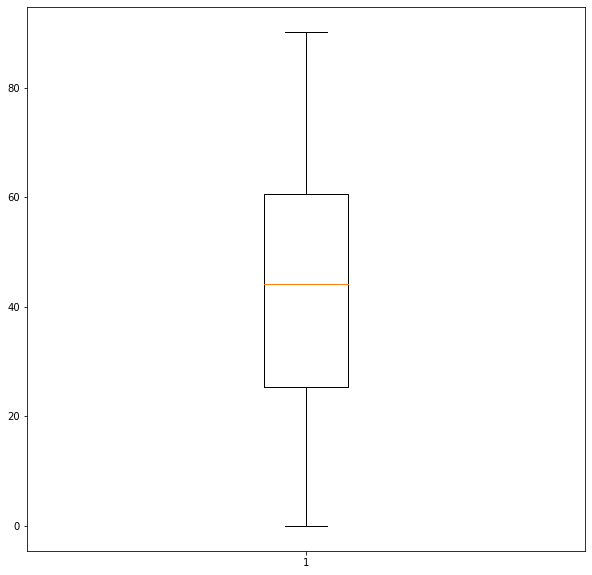

In [24]:
plt.figure(figsize=(10,10))
plt.boxplot(x='institutions',data=df,whis=1.5)

In [25]:
df.columns

Index(['sales', 'capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq',
       'value', 'institutions'],
      dtype='object')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


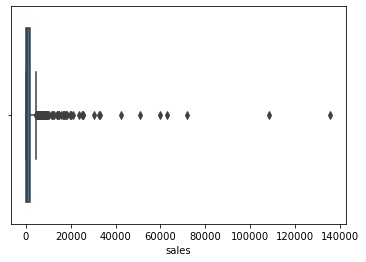

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


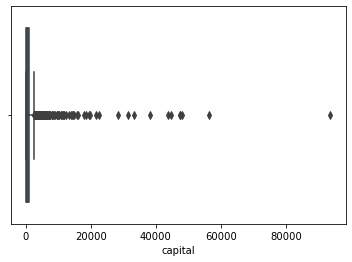

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


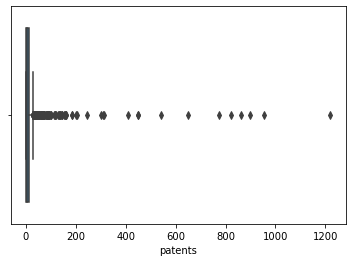

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


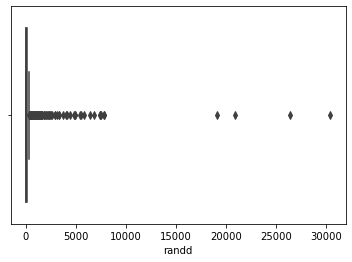

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


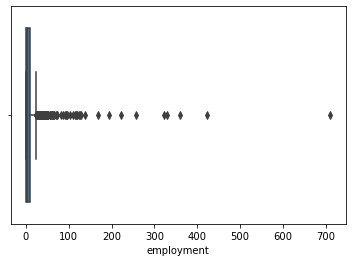

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


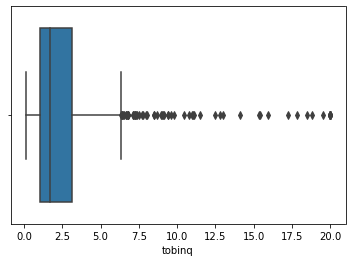

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


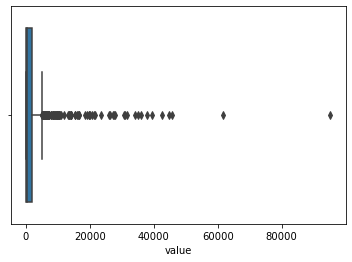

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


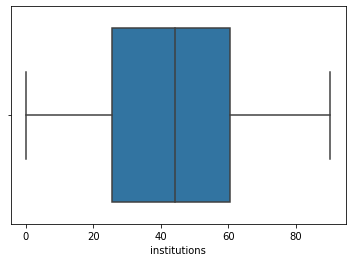

In [26]:
cols=['sales', 'capital', 'patents', 'randd', 'employment',  'tobinq',
       'value', 'institutions']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

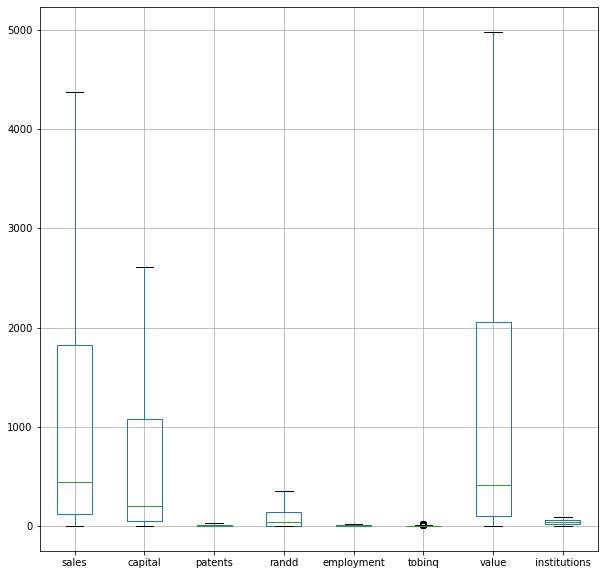

In [29]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'capital'}>,
        <AxesSubplot:title={'center':'patents'}>],
       [<AxesSubplot:title={'center':'randd'}>,
        <AxesSubplot:title={'center':'employment'}>,
        <AxesSubplot:title={'center':'tobinq'}>],
       [<AxesSubplot:title={'center':'value'}>,
        <AxesSubplot:title={'center':'institutions'}>, <AxesSubplot:>]],
      dtype=object)

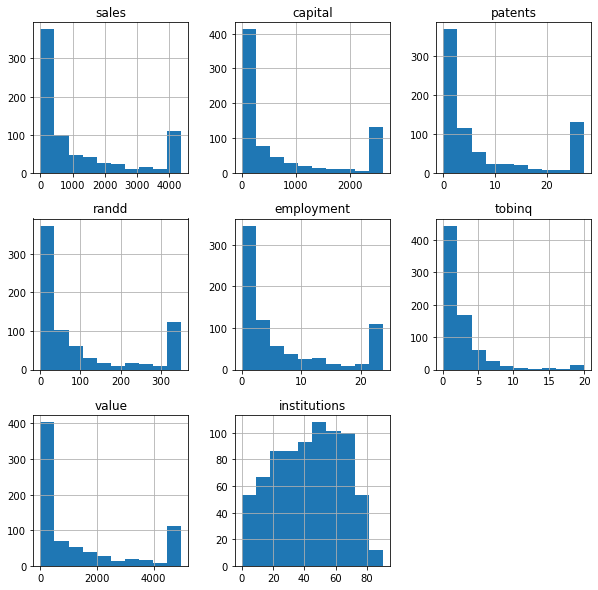

In [30]:
df.hist(figsize=(10,10))

# From above we can see that all the variable except institutions have left skewed and have outliers.

In [31]:
df.skew().sort_values(ascending=True)

C:\Users\User\AppData\Local\Temp/ipykernel_7916/2280407189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=True)


institutions   -0.168071
patents         1.162219
randd           1.162978
employment      1.186553
sales           1.189942
capital         1.190265
value           1.195849
tobinq          3.285773
dtype: float64

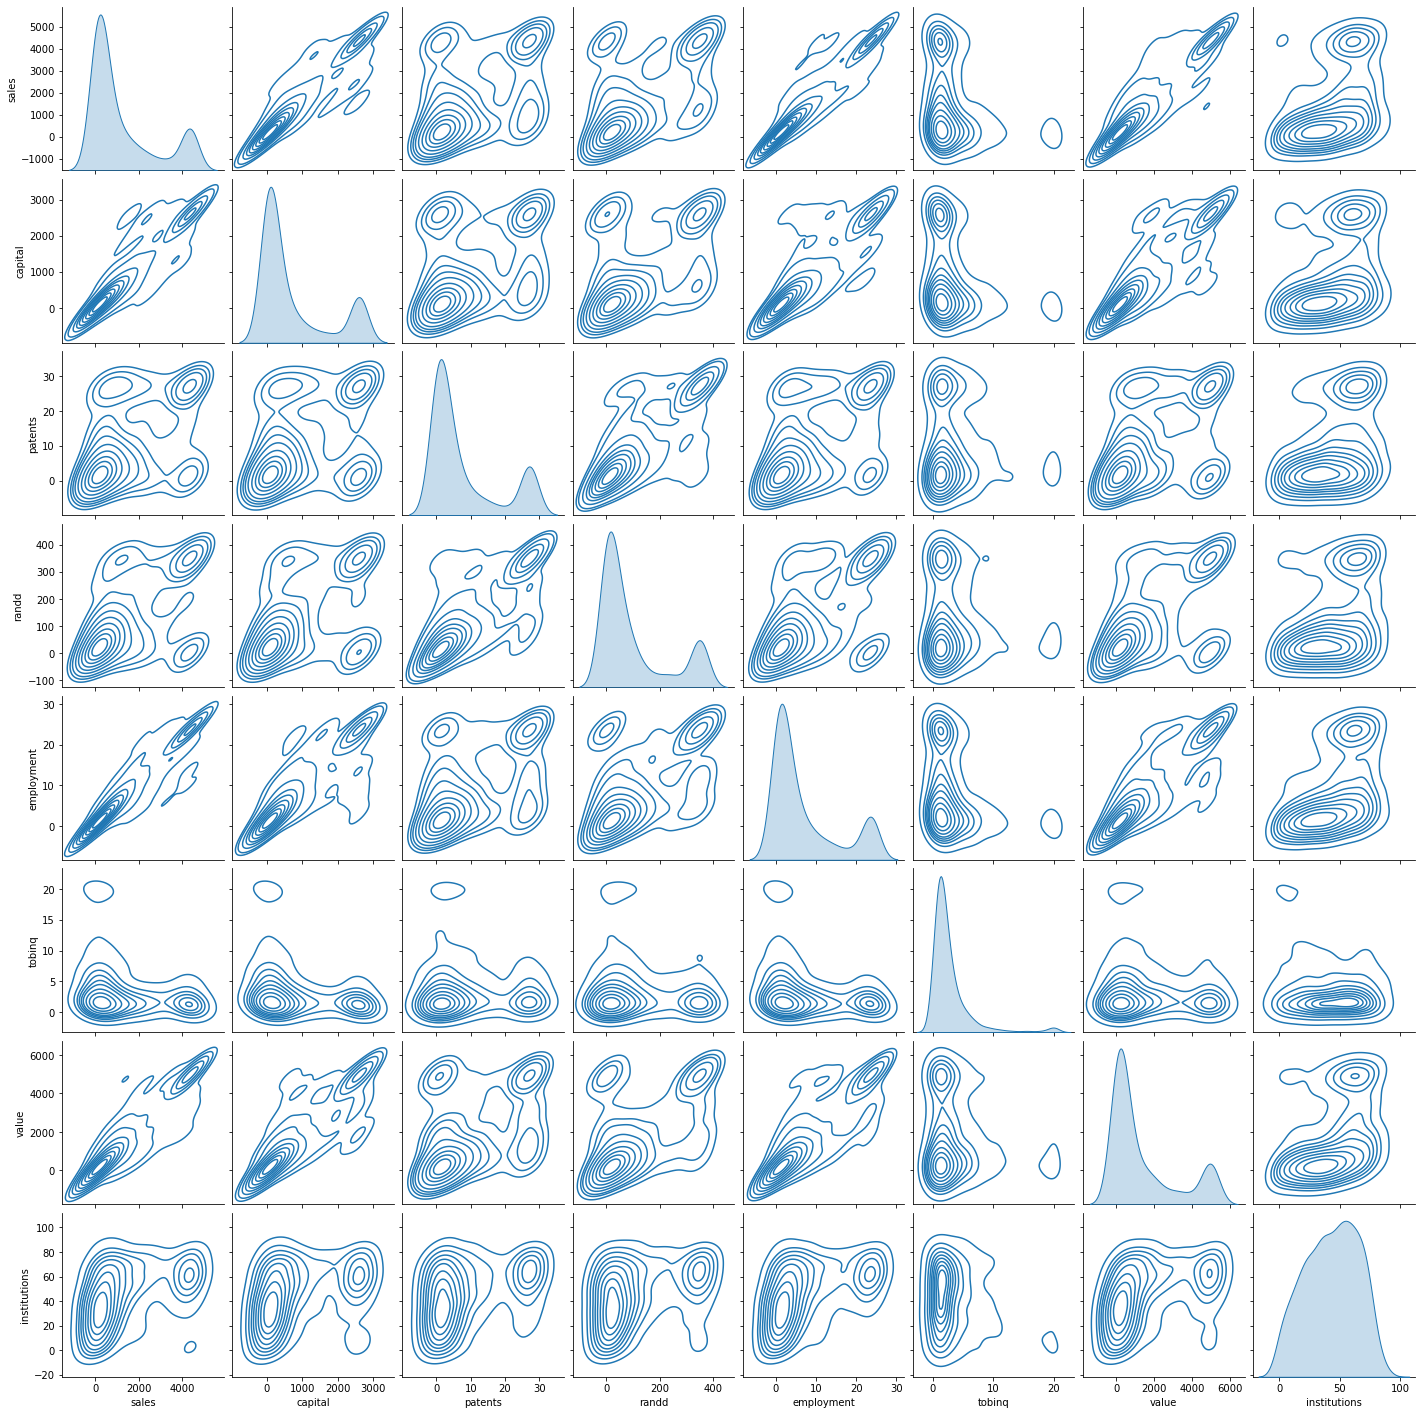

In [32]:
sns.pairplot(df,kind='kde')

In [33]:
df.corr().T

,sales,capital,patents,randd,employment,tobinq,value,institutions
sales,1.000000,0.910306,0.521817,0.622924,0.930732,-0.191035,0.895914,0.397912
capital,0.910306,1.000000,0.466951,0.566615,0.854341,-0.226479,0.854788,0.343700
patents,0.521817,0.466951,1.000000,0.766115,0.549445,0.056535,0.524527,0.337649
randd,0.622924,0.566615,0.766115,1.000000,0.627847,-0.009041,0.613369,0.334401
employment,0.930732,0.854341,0.549445,0.627847,1.000000,-0.208475,0.830223,0.402510
tobinq,-0.191035,-0.226479,0.056535,-0.009041,-0.208475,1.000000,-0.002127,-0.025241
value,0.895914,0.854788,0.524527,0.613369,0.830223,-0.002127,1.000000,0.392292
institutions,0.397912,0.343700,0.337649,0.334401,0.402510,-0.025241,0.392292,1.000000


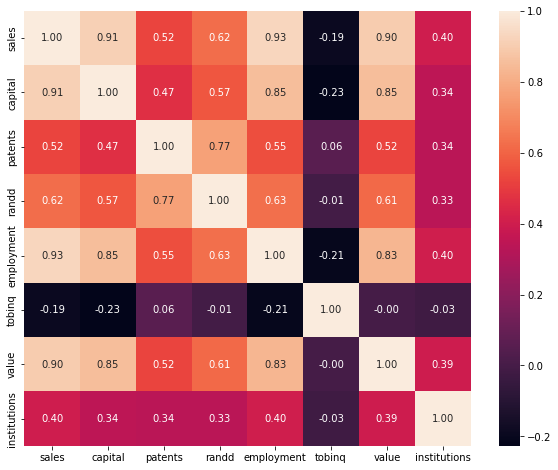

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

# Question 1.2

# Impute null values if present.Do you thinkn scaling is necessary in this case ?

#check some missing values in the given dataset.

In [35]:
df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

#As we can check that we are having null value in Tobinq.

#Now we need to check the mean , median , mode value of dataset.

In [36]:
df.mean()

C:\Users\User\AppData\Local\Temp/ipykernel_7916/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


sales           1236.090089
capital          728.715785
patents            7.800395
randd             99.512662
employment         6.925381
tobinq             2.794910
value           1375.431494
institutions      43.020540
dtype: float64

In [37]:
df.median()

C:\Users\User\AppData\Local\Temp/ipykernel_7916/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


sales           448.577082
capital         202.179023
patents           3.000000
randd            36.864136
employment        2.924000
tobinq            1.680303
value           410.793529
institutions     44.110000
dtype: float64

In [38]:
df.mode()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,4371.988416,2610.499299,0.0,351.191114,23.733752,no,20.0,4980.010044,0.0


In [39]:
df=df.fillna(df.median())

C:\Users\User\AppData\Local\Temp/ipykernel_7916/308181716.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.median())


In [40]:
df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [41]:
df.shape

(759, 9)

# Question 1.3

# Encode the data (having string values) for modelling. data split:split the data into test and train (70:30). Apply Linear Regression Performance Metrics: check the performance on predictions on train and test using Rsquare,RMSE                                                                                                                                                            

In [42]:
df.dtypes

sales           float64
capital         float64
patents         float64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [43]:
df['sp500']=np.where(df['sp500'] =='yes', '1', df['sp500'])
df['sp500']=np.where(df['sp500'] =='no', '0', df['sp500'])

In [44]:
df['sp500'] = df['sp500'].astype('float64')

In [45]:
df.dtypes

sales           float64
capital         float64
patents         float64
randd           float64
employment      float64
sp500           float64
tobinq          float64
value           float64
institutions    float64
dtype: object

In [46]:
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10.00,351.191114,2.306000,0.0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2.00,0.000000,1.860000,0.0,0.844187,243.117082,59.02
2,4371.988416,2610.499299,27.25,351.191114,23.733752,1.0,5.205257,4980.010044,47.70
3,451.000010,266.899987,1.00,83.540161,3.071000,0.0,0.305221,63.024630,26.88
4,174.927981,140.124004,2.00,14.233637,1.947000,0.0,1.063300,67.406408,49.46


# Train Test split

In [47]:
X = df.drop('sales', axis=1)

y = df[['sales']]

print(X.head())
print('\n')
print(y.head())

       capital  patents       randd  employment  sp500     tobinq  \
0   161.603986    10.00  351.191114    2.306000    0.0  11.049511   
1   122.101012     2.00    0.000000    1.860000    0.0   0.844187   
2  2610.499299    27.25  351.191114   23.733752    1.0   5.205257   
3   266.899987     1.00   83.540161    3.071000    0.0   0.305221   
4   140.124004     2.00   14.233637    1.947000    0.0   1.063300   

         value  institutions  
0  1625.453755         80.27  
1   243.117082         59.02  
2  4980.010044         47.70  
3    63.024630         26.88  
4    67.406408         49.46  


         sales
0   826.995050
1   407.753973
2  4371.988416
3   451.000010
4   174.927981


In [48]:
X_train ,X_test ,y_train ,y_test=train_test_split(X  ,y ,test_size=0.3 ,random_state=1)

In [49]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.42847423102599097
The coefficient for patents is -4.707201647817153
The coefficient for randd is 0.5938441977302858
The coefficient for employment is 79.64381157697416
The coefficient for sp500 is 169.71110467472752
The coefficient for tobinq is -16.480262742396423
The coefficient for value is 0.23144250962508106
The coefficient for institutions is 0.0893484177453614


In [51]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 28.811904631502102


In [52]:
# R square on training data
regression_model.score(X_train, y_train)

0.9354491655587379

In [53]:
# R square on testing data
regression_model.score(X_test, y_test)

0.923116101085882

In [54]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

402.40387301430326

In [55]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions,sales
626,1315.696256,15.0,73.275818,16.472000,0.0,1.657513,2231.870118,31.47,1947.224100
333,15.258002,2.0,9.252643,0.566000,0.0,0.381755,9.877838,21.69,60.327997
257,538.188036,20.0,87.388641,6.627000,0.0,2.126738,1019.443780,69.64,1065.748032
173,807.215091,0.0,68.900185,7.607001,1.0,3.151469,2221.768944,69.69,1193.647768
242,402.508010,2.0,0.000000,1.550000,0.0,2.154388,358.040202,85.42,164.135025


In [56]:
data_train.columns

Index(['capital', 'patents', 'randd', 'employment', 'sp500', 'tobinq', 'value',
       'institutions', 'sales'],
      dtype='object')

In [57]:
expr ='sales ~ capital + patents + randd + employment + sp500 + tobinq + value + institutions' 

In [58]:
import statsmodels.formula.api as smf

lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept        28.811905
capital           0.428474
patents          -4.707202
randd             0.593844
employment       79.643812
sp500           169.711105
tobinq          -16.480263
value             0.231443
institutions      0.089348
dtype: float64

In [59]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     945.6
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          6.02e-305
Time:                        11:58:49   Log-Likelihood:                -3929.5
No. Observations:                 531   AIC:                             7877.
Df Residuals:                     522   BIC:                             7915.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.8119     44.084      0.654   

In [60]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [61]:
import math

math.sqrt(mse)

402.4038730143032

In [62]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
regression_model.score(X_test, y_test)

0.923116101085882

In [63]:
# predict price  for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

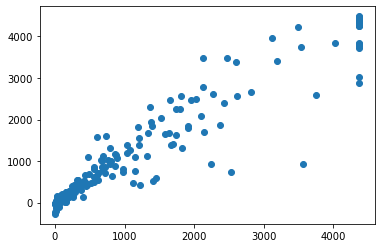

In [64]:
plt.scatter(y_test['sales'], y_pred)

In [65]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [66]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [67]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.26906654580431
The coefficient for patents is -0.030513077752473697
The coefficient for randd is 0.04858854201217764
The coefficient for employment is 0.42547346971456246
The coefficient for sp500 is 0.049416269135923306
The coefficient for tobinq is -0.033824609094776414
The coefficient for value is 0.2608628134514899
The coefficient for institutions is 0.001245185244614612


In [68]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.4656348859918976e-17


In [69]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9242037431461443

In [70]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [71]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.275311200015284

In [72]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

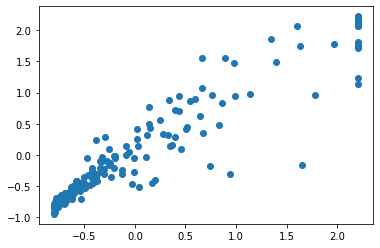

In [73]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['sales'], y_pred)

In [74]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(28.81) * Intercept + (0.43) * capital + (-4.71) * patents + (0.59) * randd + (79.64) * employment + (169.71) * sp500 + (-16.48) * tobinq + (0.23) * value + (0.09) * institutions + 

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 8.395261454766336
patents ---> 4.111535172959012
randd ---> 4.70591369415132
employment ---> 8.845053042338
sp500 ---> 3.742774549016143
tobinq ---> 1.8221996689301851
value ---> 8.97884183349674
institutions ---> 3.0031422135132573


In [76]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df.drop('sales', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['sales']]

In [77]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be


In [78]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.42847423102599097
The coefficient for patents is -4.707201647817153
The coefficient for randd is 0.5938441977302858
The coefficient for employment is 79.64381157697416
The coefficient for sp500 is 169.71110467472752
The coefficient for tobinq is -16.480262742396423
The coefficient for value is 0.23144250962508106
The coefficient for institutions is 0.0893484177453614


In [79]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 28.811904631502102


In [80]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.9354491655587379
0.923116101085882


# Question 1.4

# Inference:Based on these Predictions what are the business insights and recommendations

# Problem 2 Logistic Regression

# # You are hired by the Government to do an analysis of car crashes.You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

# Data Dictionary for Car_Crash

1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Question 2.1

# Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [82]:
new_df=pd.read_csv('Car_Crash.txt',sep=',')

In [83]:
new_df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,02:17:01
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01


In [84]:
new_df.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999,deploy,pass,1,0.0,82:110:2


In [85]:
new_df.shape

(11217, 16)

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  int64  
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(2), int64(6), object(8)
memory usage: 1.4+ MB


In [87]:
# from above we can see that all variables having non-null values of 11217 and only one variable 'injseeverity' having null value 77.

In [88]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11217.0,5608.000000,3238.213319,0.0,2804.000,5608.000,8412.000,11216.00
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [89]:
new_df.duplicated().sum()

0

In [90]:
new_df.isnull().sum()

Unnamed: 0      0
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [91]:
new_df.nunique()

Unnamed: 0     11217
dvcat              5
weight          4551
Survived           2
airbag             2
seatbelt           2
frontal            2
sex                2
ageOFocc          80
yearacc            6
yearVeh           43
abcat              3
occRole            2
deploy             2
injSeverity        6
caseid          6099
dtype: int64

In [92]:
df=new_df.drop('Unnamed: 0',axis=1)

In [93]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,02:17:01
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01


In [94]:
df.injSeverity.isnull().sum()

77

In [95]:
df.injSeverity.unique()

array([ 4.,  3.,  5.,  2.,  0.,  1., nan])

In [96]:
df[df['injSeverity'].isna()]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
767,10-24,10.579,survived,airbag,none,1,f,97,2000,2000,deploy,driver,1,NaN,49:78:1
1025,40-54,9.780,survived,none,none,1,f,97,2000,1984,unavail,driver,0,NaN,72:65:1
1121,40-54,23.081,survived,airbag,none,0,f,68,2000,1999,nodeploy,driver,0,NaN,73:44:01
1576,10-24,52.779,survived,airbag,belted,1,m,25,2000,1999,nodeploy,pass,0,NaN,75:02:02
1594,25-39,56.280,survived,airbag,belted,0,f,53,2000,1999,nodeploy,pass,0,NaN,75:09:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,10-24,548.186,survived,airbag,belted,1,m,25,2002,1999,deploy,pass,1,NaN,75:47:01
10464,10-24,440.426,survived,airbag,belted,1,m,22,2002,1999,nodeploy,pass,0,NaN,75:49:01
10980,10-24,20.409,survived,none,belted,1,f,17,2002,1987,unavail,pass,0,NaN,81:10:02
11042,25-39,392.914,survived,airbag,belted,1,f,59,2002,1999,nodeploy,pass,0,NaN,81:71:1


In [97]:
df['injSeverity'] = df['injSeverity'].fillna(0)

In [98]:
df[df['injSeverity'].isna()]

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid


In [99]:
df.injSeverity.isnull().sum()

0

In [100]:
df.shape

(11217, 15)

In [101]:
df.dvcat.value_counts()

10-24    5414
25-39    3368
40-54    1344
55+       809
1-9       282
Name: dvcat, dtype: int64

In [102]:
df.Survived.value_counts()

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [103]:
df.airbag.value_counts()

airbag    7064
none      4153
Name: airbag, dtype: int64

In [104]:
df.seatbelt.value_counts()

belted    7849
none      3368
Name: seatbelt, dtype: int64

In [105]:
df.sex.value_counts()

m    6048
f    5169
Name: sex, dtype: int64

In [106]:
df.abcat.value_counts()

deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64

In [107]:
df.occRole.value_counts()

driver    8786
pass      2431
Name: occRole, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


<AxesSubplot:>

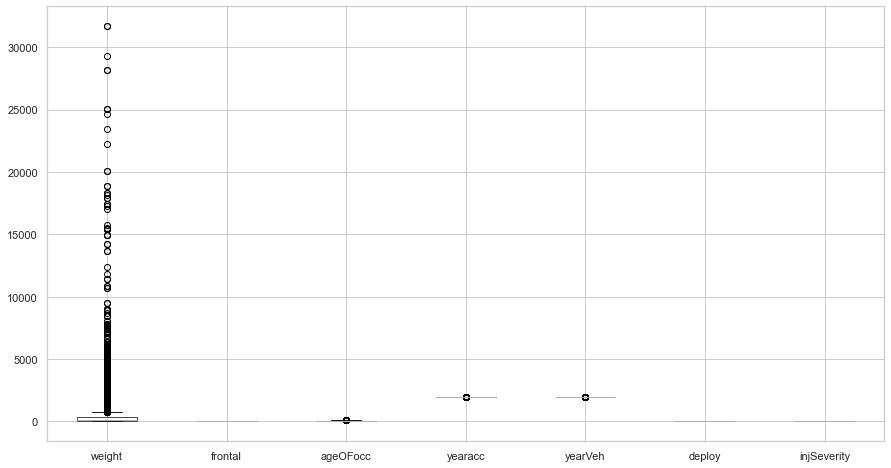

In [109]:
df.boxplot(figsize=(15,8))

array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'frontal'}>,
        <AxesSubplot:title={'center':'ageOFocc'}>],
       [<AxesSubplot:title={'center':'yearacc'}>,
        <AxesSubplot:title={'center':'yearVeh'}>,
        <AxesSubplot:title={'center':'deploy'}>],
       [<AxesSubplot:title={'center':'injSeverity'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

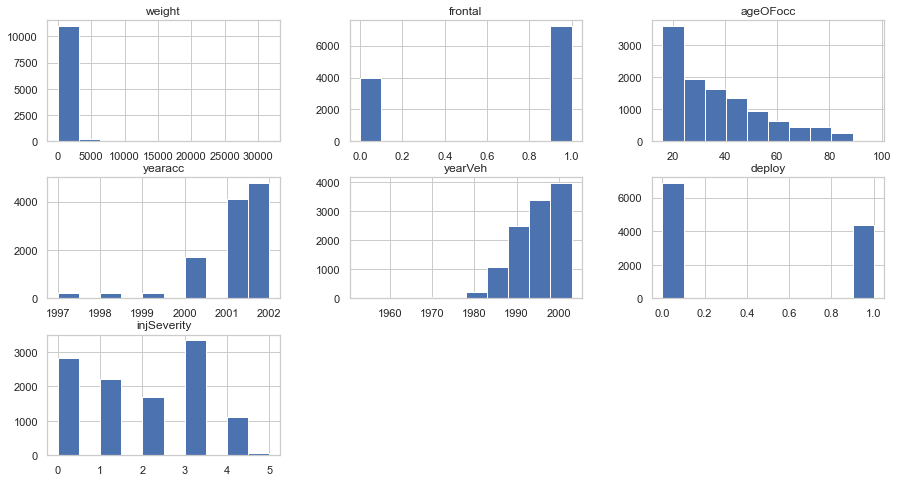

In [110]:
df.hist(figsize=(15,8))

In [111]:
df.skew(axis = 0)

C:\Users\User\AppData\Local\Temp/ipykernel_7916/3517674506.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0)


weight         11.115386
frontal        -0.601667
ageOFocc        0.911059
yearacc        -1.671687
yearVeh        -1.026743
deploy          0.454813
injSeverity     0.046053
dtype: float64

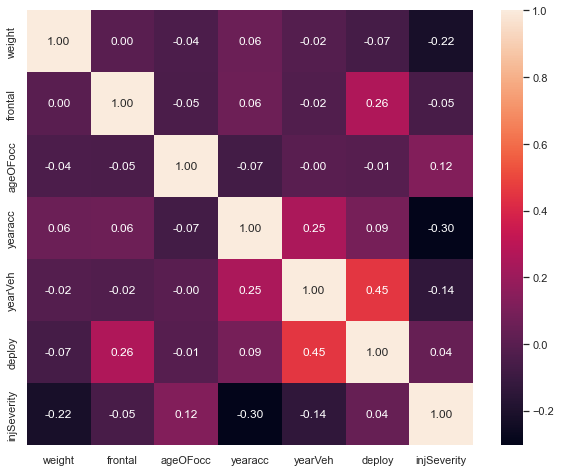

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_7916/238787678.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


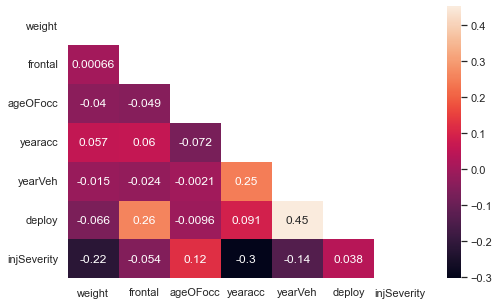

In [113]:
plt.figure(figsize=(8,5));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

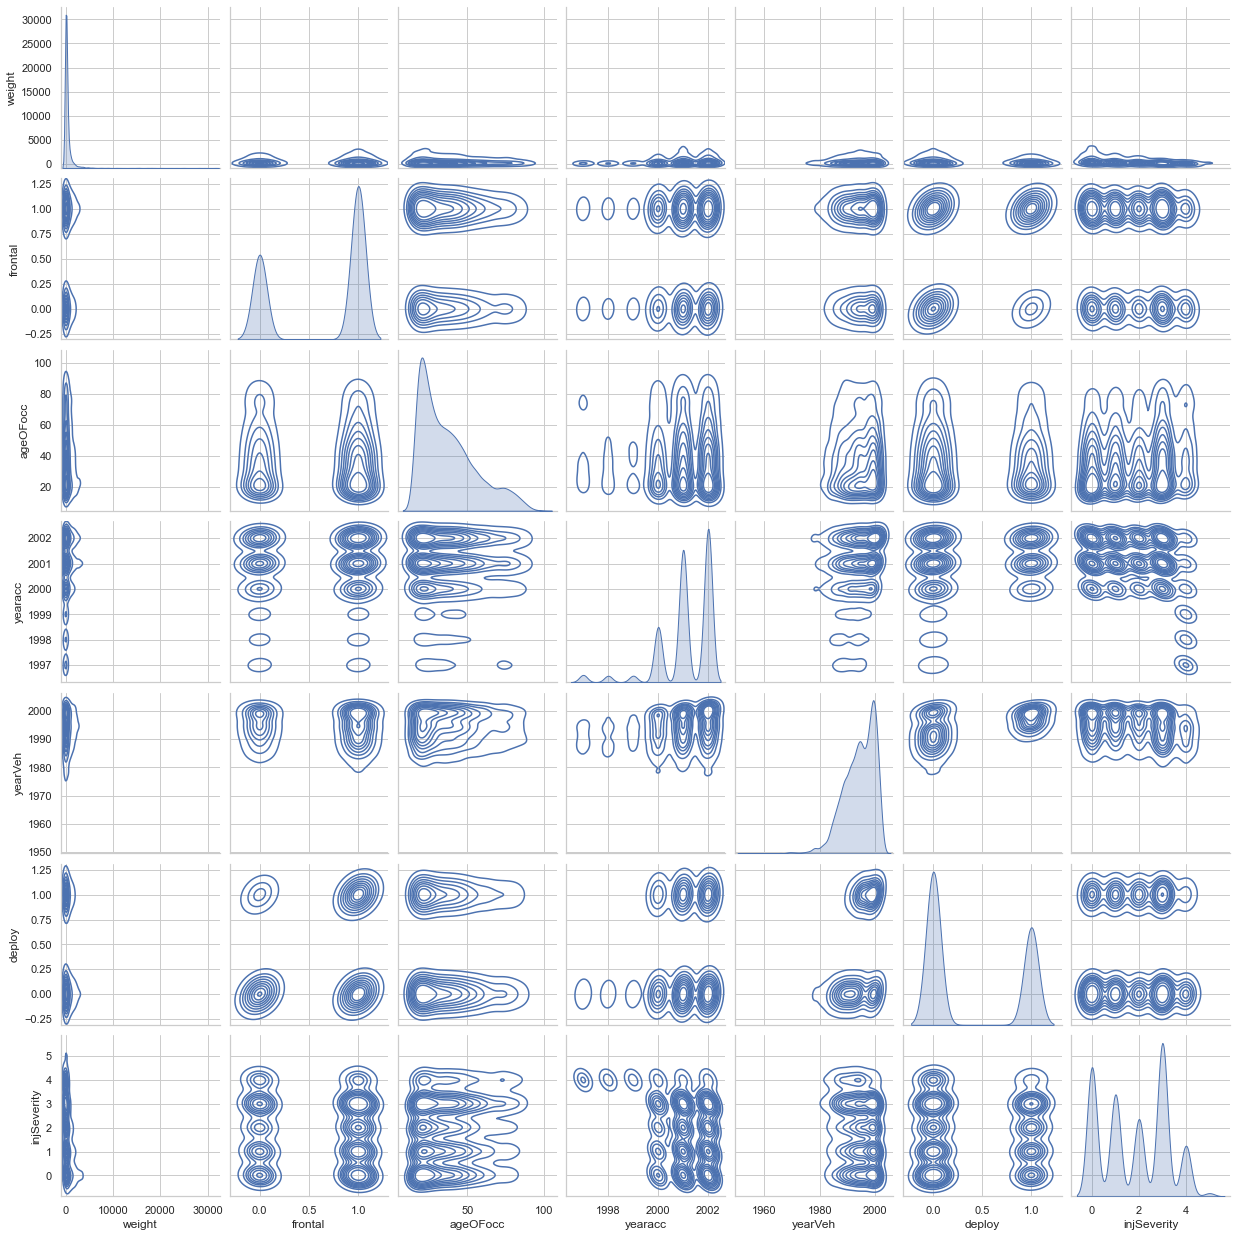

In [114]:
sns.pairplot(df,kind='kde');

In [115]:
corr = df.corr()
corr

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
weight,1.000000,0.000659,-0.040111,0.056892,-0.015226,-0.065783,-0.220400
frontal,0.000659,1.000000,-0.048856,0.059768,-0.024267,0.260388,-0.054496
ageOFocc,-0.040111,-0.048856,1.000000,-0.072271,-0.002070,-0.009556,0.124169
yearacc,0.056892,0.059768,-0.072271,1.000000,0.247743,0.091252,-0.303666
yearVeh,-0.015226,-0.024267,-0.002070,0.247743,1.000000,0.452448,-0.140054
deploy,-0.065783,0.260388,-0.009556,0.091252,0.452448,1.000000,0.038374
injSeverity,-0.220400,-0.054496,0.124169,-0.303666,-0.140054,0.038374,1.000000


# Question 2.2

# Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

#Encode the data

In [116]:
df.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh          int64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [117]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

dvcat
10-24    5414
25-39    3368
40-54    1344
55+       809
1-9       282
Name: dvcat, dtype: int64


Survived
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64


airbag
airbag    7064
none      4153
Name: airbag, dtype: int64


seatbelt
belted    7849
none      3368
Name: seatbelt, dtype: int64


sex
m    6048
f    5169
Name: sex, dtype: int64


abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64


occRole
driver    8786
pass      2431
Name: occRole, dtype: int64


caseid
0.439594907    8
0.606956019    8
0.604872685    8
0.623622685    8
0.451412037    7
              ..
74:169:2       1
74:162:1       1
74:160:1       1
75:71:2        1
43:158:2       1
Name: caseid, Length: 6099, dtype: int64




In [118]:
df.caseid.head()

0       02:13:02
1       02:17:01
2    0.138206019
3    0.138206019
4       04:58:01
Name: caseid, dtype: object

In [119]:
df.caseid.duplicated()

0        False
1        False
2        False
3         True
4        False
         ...  
11212    False
11213     True
11214     True
11215    False
11216     True
Name: caseid, Length: 11217, dtype: bool

In [120]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dvcat,11217,5,10-24,5414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,11217.0,NaN,NaN,NaN,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
Survived,11217,2,survived,10037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airbag,11217,2,airbag,7064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seatbelt,11217,2,belted,7849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontal,11217.0,NaN,NaN,NaN,0.644022,0.47883,0.0,0.0,1.0,1.0,1.0
sex,11217,2,m,6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ageOFocc,11217.0,NaN,NaN,NaN,37.427654,18.192429,16.0,22.0,33.0,48.0,97.0
yearacc,11217.0,NaN,NaN,NaN,2001.103236,1.056805,1997.0,2001.0,2001.0,2002.0,2002.0
yearVeh,11217.0,NaN,NaN,NaN,1994.177944,5.658704,1953.0,1991.0,1995.0,1999.0,2003.0


In [121]:
df=df.drop('caseid',axis=1)
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0


In [122]:
df['dvcat']=np.where(df['dvcat'] =='1-9', '0', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='10-24', '1', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='25-39', '2', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='40-54', '3', df['dvcat'])
df['dvcat']=np.where(df['dvcat'] =='55+', '4', df['dvcat'])

In [123]:
df['Survived']=np.where(df['Survived'] =='survived', '1', df['Survived'])
df['Survived']=np.where(df['Survived'] =='Not_Survived', '0', df['Survived'])


In [124]:
df['airbag']=np.where(df['airbag'] =='airbag', '1', df['airbag'])
df['airbag']=np.where(df['airbag'] =='none', '0', df['airbag'])

In [125]:
df['seatbelt']=np.where(df['seatbelt'] =='belted', '1', df['seatbelt'])
df['seatbelt']=np.where(df['seatbelt'] =='none', '0', df['seatbelt'])

In [126]:
df['sex']=np.where(df['sex'] =='m', '1', df['sex'])
df['sex']=np.where(df['sex'] =='f', '0', df['sex'])

In [127]:
df['abcat']=np.where(df['abcat'] =='deploy', '2', df['abcat'])
df['abcat']=np.where(df['abcat'] =='unavail', '1', df['abcat'])
df['abcat']=np.where(df['abcat'] =='nodeploy', '0', df['abcat'])

In [128]:
df['occRole']=np.where(df['occRole'] =='driver', '1', df['occRole'])
df['occRole']=np.where(df['occRole'] =='pass', '0', df['occRole'])

In [129]:
df['dvcat'] = (df['dvcat']).astype('int64')
df['Survived'] = df['Survived'].astype('float64')
df['airbag'] = df['airbag'].astype('float64')
df['seatbelt'] = df['seatbelt'].astype('float64')
df['sex'] = df['sex'].astype('float64')
df['abcat'] = df['abcat'].astype('float64')
df['occRole'] = df['occRole'].astype('float64')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  int64  
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  float64
 3   airbag       11217 non-null  float64
 4   seatbelt     11217 non-null  float64
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  float64
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  float64
 11  occRole      11217 non-null  float64
 12  deploy       11217 non-null  int64  
 13  injSeverity  11217 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 1.2 MB


<AxesSubplot:ylabel='count'>

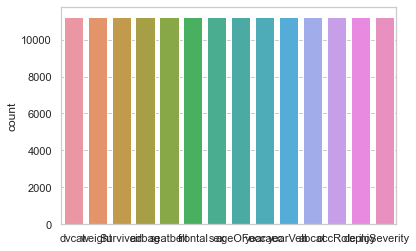

In [131]:
sns.countplot(data=df)

# Train test split

In [132]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.30)



print(X.head())
print('\n')
print(y.head())

   dvcat  weight  airbag  seatbelt  frontal  sex  ageOFocc  yearacc  yearVeh  \
0      4  27.078     0.0       0.0        1  1.0        32     1997     1987   
1      2  89.627     1.0       1.0        0  0.0        54     1997     1994   
2      4  27.078     0.0       1.0        1  1.0        67     1997     1992   
3      4  27.078     0.0       1.0        1  0.0        64     1997     1992   
4      4  13.374     0.0       0.0        1  1.0        23     1997     1986   

   abcat  occRole  deploy  injSeverity  
0    1.0      1.0       0          4.0  
1    0.0      1.0       0          4.0  
2    1.0      1.0       0          4.0  
3    1.0      0.0       0          4.0  
4    1.0      1.0       0          4.0  


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Survived, dtype: float64


In [134]:
print(y_train.value_counts())
print('\n')
print(y_train.value_counts(1))

1.0    7054
0.0     797
Name: Survived, dtype: int64


1.0    0.898484
0.0    0.101516
Name: Survived, dtype: float64


In [135]:
print(y_test.value_counts())
print('\n')
print(y_test.value_counts(1))

1.0    2983
0.0     383
Name: Survived, dtype: int64


1.0    0.886215
0.0    0.113785
Name: Survived, dtype: float64


# Applying Grid search method

In [136]:
grid={'penalty':['l1','l2','none'],'solver':['saga','liblinear'],'tol':[0.0001,0.000001]}

In [137]:
LogR=LogisticRegression(max_iter=100000,n_jobs=2)

In [138]:
grid_search=GridSearchCV(estimator=LogR,param_grid=grid,cv=3,n_jobs=-1,scoring='f1')

In [139]:
grid_search.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.946528   0.94645008 0.98953033 0.98917868 0.946528   0.94645008
 0.98939485 0.98882721 0.946528   0.94645008        nan        nan]
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [140]:
print(grid_search.best_params_)
print('\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [141]:
best_model = grid_search.best_estimator_
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,9.523326e-01,0.047667
1,9.797689e-01,0.020231
2,5.260767e-10,1.000000
3,5.628008e-07,0.999999
4,6.060386e-02,0.939396


In [142]:
ytrain_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,1.311027e-02,0.986890
1,2.096431e-02,0.979036
2,5.132869e-04,0.999487
3,4.315557e-06,0.999996
4,5.334730e-09,1.000000


# Accuracy for training and testing

In [143]:
best_model.score(X_train,y_train)

0.9811488982295249

AUC: 0.987


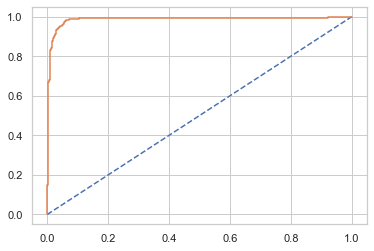

In [144]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs_cart = grid_search.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

# AUC and ROC for test data

AUC: 0.988


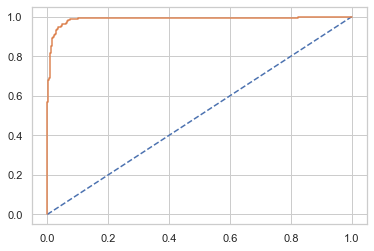

In [145]:
# predict probabilities
probs_cart = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

# Confusion matrix for train data

In [146]:
LogR.fit(X_train, y_train)

LogisticRegression(max_iter=100000, n_jobs=2)

In [147]:
LogR.fit(X_test, y_test)

LogisticRegression(max_iter=100000, n_jobs=2)

In [148]:
ytrain_predict = LogR.predict(X_train)
ytest_predict = LogR.predict(X_test)

In [149]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
confusion_matrix(y_train, ytrain_predict)

array([[ 705,   92],
       [  56, 6998]], dtype=int64)

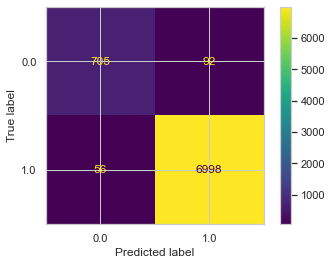

In [150]:
plot_confusion_matrix(LogR,X_train,y_train);

In [151]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       797
         1.0       0.99      0.99      0.99      7054

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



# confusion matrix for test data

In [152]:
LogR.fit(X_test, y_test)

LogisticRegression(max_iter=100000, n_jobs=2)

In [153]:
confusion_matrix(y_test, ytest_predict)

array([[ 343,   40],
       [  20, 2963]], dtype=int64)

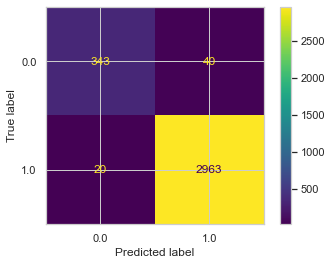

In [154]:
plot_confusion_matrix(LogR,X_test,y_test);

In [155]:
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, ytest_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, ytest_predict))

Confusion Matrix 
 [[ 343   40]
 [  20 2963]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       383
         1.0       0.99      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.97      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



# Linear discriminent analysis

In [156]:
clf=LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
pred_class_train=model.predict(X_train)
pred_class_test=model.predict(X_test)

# Predicting the variable

In [157]:
pred_prob_train = model.predict_proba(X_train)

pred_prob_test = model.predict_proba(X_test)
pred_prob_train[:,1]

array([0.98962521, 0.99749555, 0.99867573, ..., 0.99944503, 0.99639963,
       0.10479073])

# model score for train set

In [158]:
model.score(X_train , y_train)

0.9602598395108903

In [159]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.9797979797979798


In [160]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9800950683303624
[[ 338   45]
 [  22 2961]]
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       383
         1.0       0.99      0.99      0.99      2983

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
confusion_matrix(y_train,pred_class_train)

array([[ 555,  242],
       [  70, 6984]], dtype=int64)

# model score for test data

In [162]:
model.score(X_test , y_test)

0.9800950683303624

In [163]:
print(classification_report(y_test,pred_class_test))

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81       383
         1.0       0.96      0.99      0.98      2983

    accuracy                           0.96      3366
   macro avg       0.94      0.85      0.89      3366
weighted avg       0.96      0.96      0.96      3366



In [164]:
confusion_matrix(y_test,pred_class_test)

array([[ 275,  108],
       [  24, 2959]], dtype=int64)

# Question 2.3

# Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.Compare both the models and write inferences, which model is best/optimized.

# Answer

# Training Data and Test data confusion matrix Comparison

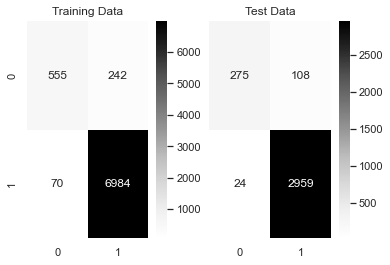

In [165]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.969
AUC for the Test Data: 0.967


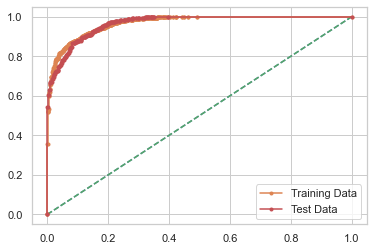

In [166]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Changing the Cutoff Value for better Accuracy and f1 Score

0.1 

Accuracy Score 0.9533
F1 Score 0.9746 

Confusion Matrix


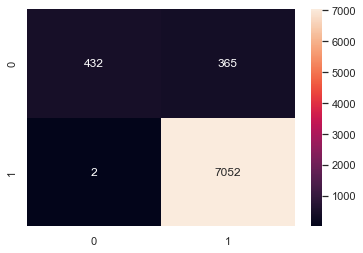

0.2 

Accuracy Score 0.9575
F1 Score 0.9769 

Confusion Matrix


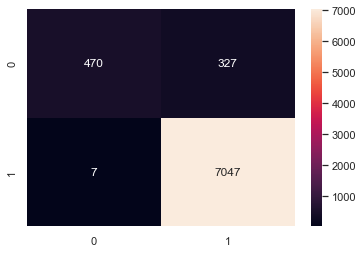

0.3 

Accuracy Score 0.9594
F1 Score 0.9778 

Confusion Matrix


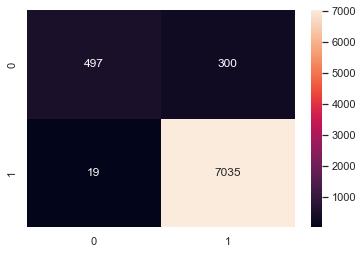

0.4 

Accuracy Score 0.9594
F1 Score 0.9778 

Confusion Matrix


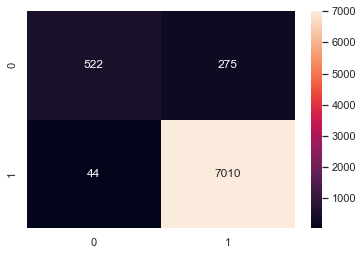

0.5 

Accuracy Score 0.9603
F1 Score 0.9782 

Confusion Matrix


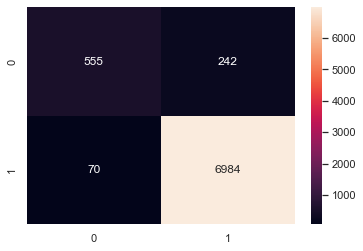

0.6 

Accuracy Score 0.9583
F1 Score 0.977 

Confusion Matrix


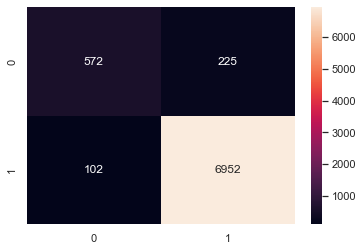

0.7 

Accuracy Score 0.9561
F1 Score 0.9756 

Confusion Matrix


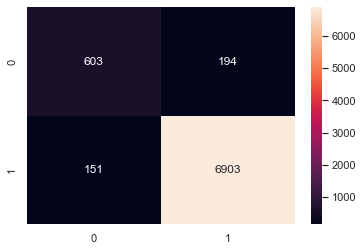

0.8 

Accuracy Score 0.9483
F1 Score 0.9711 

Confusion Matrix


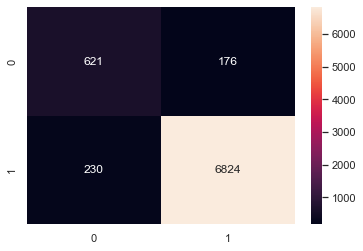

0.9 

Accuracy Score 0.927
F1 Score 0.9585 

Confusion Matrix


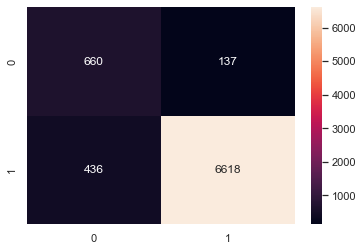

In [167]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

# AUC and ROC for the training data

AUC for the Training Data: 0.969
AUC for the Test Data: 0.967


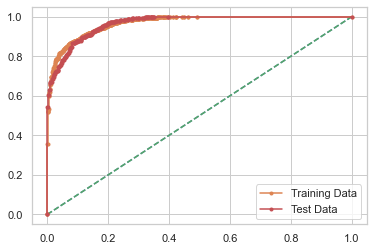

In [168]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Training Data and Test data confusion matrix Comparison

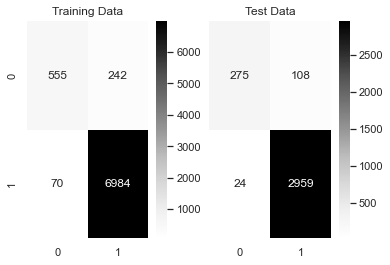

In [169]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

# Question 2.4

# Inference: Based on these predictions, what are the insights and recommendations. 

In [171]:
# Answer: in pdf